In [55]:
import umap
import math
import numpy as np
import pandas as pd
import requests
import os
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [49]:
def appendSpherical_np(xyz):
    ptsnew = np.hstack((xyz, np.zeros(xyz.shape)))
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,3] = np.sqrt(xy + xyz[:,2]**2)
    ptsnew[:,4] = np.arctan2(np.sqrt(xy), xyz[:,2]) # for elevation angle defined from Z-axis down
    #ptsnew[:,4] = np.arctan2(xyz[:,2], np.sqrt(xy)) # for elevation angle defined from XY-plane up
    ptsnew[:,5] = np.arctan2(xyz[:,1], xyz[:,0])
    return ptsnew

def _coords(_x,_y,R=1.0):
    x = R * math.cos(_x) * math.cos(_y)
    y = R * math.cos(_x) * math.sin(_y)
    z = R * math.sin(_x)
                 
    return np.array([x,y,z])
                 

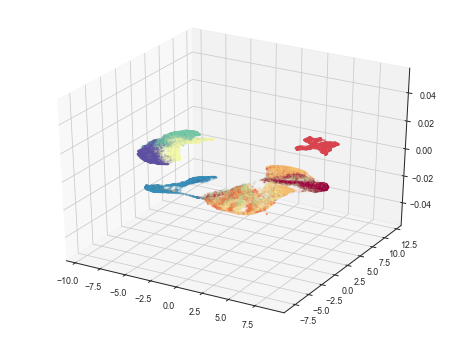

In [57]:
sns.set(context="paper", style="white")
if not os.path.isfile('fashion-mnist.csv'):
    csv_data = requests.get(
        'https://www.openml.org/data/get_csv/18238735/phpnBqZGZ'
    )
    with open('fashion-mnist.csv', 'w') as f:
        f.write(csv_data.text)
source_df = pd.read_csv('fashion-mnist.csv')

the_data = source_df.iloc[:, :784].values.astype(np.float32)
target = source_df['class'].values

pal = [
 '#9e0142',
 '#d8434e',
 '#f67a49',
 '#fdbf6f',
 '#feeda1',
 '#f1f9a9',
 '#bfe5a0',
 '#74c7a5',
 '#378ebb',
 '#5e4fa2'
]
color_key = {str(d):c for d,c in enumerate(pal)}
#the_data =  pd.DataFrame(data=np.random.rand(10000,6))

reducer = umap.UMAP(random_state=42)
reduced = reducer.fit_transform(the_data)
spherized = []

for i,coord in enumerate(reduced):
    spherized.append(_coords(coord[0],coord[1]))
    
#df = pd.DataFrame(spherized, columns=('x','y','z'))
df = pd.DataFrame(reduced, columns=('x','y'))

df['c'] = pd.Series([pal[int(x)] for x in target], dtype="category")
#


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['x']
ys = df['y']
#zs = df['z']
cs = df['c']
ax.scatter(xs, 
           ys, 
           #zs, 
           s=1, 
           alpha=0.1,
           c = cs )
#ax.set_aspect(1.0)

plt.show()

In [ ]:
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))

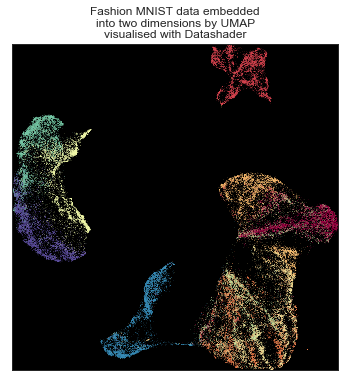

In [3]:
img = tf.shade(agg, color_key=color_key, how='eq_hist')

utils.export_image(img, filename='fashion-mnist', background='black')

image = plt.imread('fashion-mnist.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Fashion MNIST data embedded\n"
          "into two dimensions by UMAP\n"
          "visualised with Datashader",
          fontsize=12)

plt.show()

array([[0.28048678, 0.54664709, 0.79873163, 0.85939008, 0.99647816,
        0.96393894],
       [0.36755028, 0.37638888, 0.28752389, 0.19662953, 0.58014957,
        0.25889342],
       [0.16654639, 0.18514341, 0.21187935, 0.62826245, 0.70431545,
        0.24425323],
       ...,
       [0.68828442, 0.39005952, 0.50218129, 0.83322723, 0.0761438 ,
        0.92875761],
       [0.55478121, 0.32944234, 0.83048663, 0.2380931 , 0.76304977,
        0.27685634],
       [0.14772873, 0.153493  , 0.24889805, 0.53124607, 0.53301835,
        0.33698717]])

In [67]:
g = np.array([1,2,3,4])
np.append(g,[5,6,7]) #= np.append(g,8)
print(g)

[1 2 3 4]


In [71]:
from multiprocessing import Process, Queue
the_coords = Queue()
print(the_coords.empty())

True
